In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Core Misson
- 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.
- 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [2]:
d = pd.read_csv('charcters_stats.csv')

df = pd.DataFrame(d)

df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [3]:
df.sort_values(by='Total', ascending=False)

# 수치 합이 가장f.sort_values(by='Total', ascending=False)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
537,Superman,good,100,100,100,100,94,85,579
16,Amazo,bad,75,100,100,100,100,100,575
...,...,...,...,...,...,...,...,...,...
462,Renata Soliz,good,1,1,1,1,0,1,5
137,Captain Mar-vell,good,1,1,1,1,0,1,5
136,Captain Epic,good,1,1,1,1,0,1,5
466,Ripcord,good,1,1,1,1,0,1,5


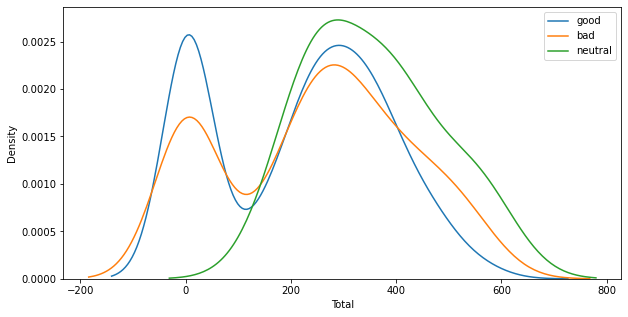

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.kdeplot(data=df[df.Alignment == 'good']['Total'], ax=ax)
sns.kdeplot(data=df[df.Alignment == 'bad']['Total'], ax=ax)
sns.kdeplot(data=df[df.Alignment == 'neutral']['Total'], ax=ax)

plt.legend(['good', 'bad', 'neutral'])

plt.show()

In [5]:
df.groupby(['Alignment'])['Total'].mean()

Alignment
bad        247.212121
good       214.990741
neutral    355.363636
Name: Total, dtype: float64

## Extra Mission

- 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.
- 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.
- 이 데이터를 이용해 진행하고 싶은 EDA 및 시각화가 있다면 자유롭게 진행하여라.
- 이 과제는 핵심 임무 이후에 진행되어야 한다.

### How to
- merge를 사용하여 각 캐릭터의 charcters_stats, characters, marvel_dc_characters를 병합
- 분석

In [6]:
d2 = pd.read_csv('marvel_characters_info.csv')

df.info()
print('--------------------------------------')
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          611 non-null    object
 1   Alignment     608 non-null    object
 2   Intelligence  611 non-null    int64 
 3   Strength      611 non-null    int64 
 4   Speed         611 non-null    int64 
 5   Durability    611 non-null    int64 
 6   Power         611 non-null    int64 
 7   Combat        611 non-null    int64 
 8   Total         611 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.1+ KB
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         734 non-null    int64  
 1   Name       734 non-null    object 
 2   Alignment  734 non-null    object 
 3   Gender     734 non-null    object 

### df
- charcters_stats.csv
- Columns
    - Name : object
    - Alignment : object
    - Intelligence : int64
    - Strength : int64
    - Speed : int64
    - Durability : int64
    - Power : int64
    - Combat : int64
    - Total : int64

### d2
- marvel_characters_info.csv
- Columns
    - ID                : int64
    - Name              : object
    - Alignment         : object
    - Gender            : object
    - EyeColor          : object
    - Race : object
    - HairColor         : object
    - Publisher : object
    - SkinColor : object
    - Height : float64
    - Weight : float64

In [7]:
merge_df = pd.merge(df, d2, how='inner', on=['Name', 'Alignment'])

merge_df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,A-Bomb,good,38,100,17,80,17,64,316,0,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,Abe Sapien,good,88,14,35,42,35,85,299,1,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,Abin Sur,good,50,90,53,64,84,65,406,2,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,Abomination,bad,63,80,53,90,55,95,436,3,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,Abraxas,bad,88,100,83,99,100,56,526,4,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0


In [8]:
DC_mean = merge_df[merge_df.Publisher == 'DC Comics']['Total'].mean()
Marvel_mean = merge_df[merge_df.Publisher == 'Marvel Comics']['Total'].mean()

DC_mean, Marvel_mean

# DC Win!!!!

(251.42168674698794, 241.86627906976744)

In [9]:
good = DC_mean = merge_df[merge_df.Alignment == 'good']['Total']
bad = DC_mean = merge_df[merge_df.Alignment == 'bad']['Total']

good.mean(), bad.mean()
# 둘이 싸웠을때 나쁜놈들 win!
# 중립국이 개입한다면?

(218.92142857142858, 248.13924050632912)

In [10]:
good_and_neutral = merge_df[(merge_df.Alignment == 'good') | (merge_df.Alignment == 'neutral')]['Total']

good_and_neutral.mean(), bad.mean()
# 중립국 개입에도 불구하고 나쁜놈들 win!

(222.40371229698377, 248.13924050632912)